In [17]:
import pandas
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.stats.kde import gaussian_kde

from numpy import linspace,hstack
from pylab import plot,show,hist

In [2]:
df=pandas.read_csv("german_credit_data.csv")

In [3]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [4]:
df.shape

(1000, 11)

In [5]:
l1=df

In [7]:
df.drop(l1.columns[0], axis='columns')


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [8]:
df.info

<bound method DataFrame.info of      Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
5             5   35    male    1    free             NaN              NaN   
6             6   53    male    2     own      quite rich              NaN   
7             7   35    male    3    rent          little         moderate   
8             8   61    male    1     own            rich              NaN   
9             9   28    male    3     own          little         moderate   
10           10   25  female    2    rent          little         moderate   
11           11   24  female    

In [10]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [15]:
(df['Credit amount']<df['Credit amount'].mean()).sum()/df['Credit amount'].count()*100

65.8

In [16]:
df_good = df[df["Risk"] == 'good']
df_bad = df[df["Risk"] == 'bad']

E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


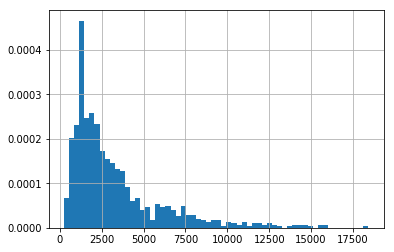

In [30]:
df['Credit amount'].hist(bins=60,normed=1)

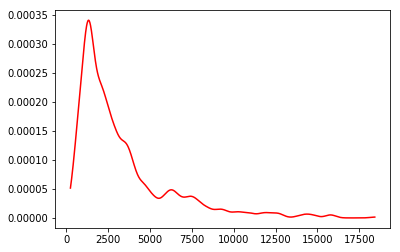

In [18]:
my_density = gaussian_kde(df['Credit amount'], bw_method = 0.1)


# график 
x = linspace(min(df['Credit amount']), max(df['Credit amount']),1000)
plot(x, my_density(x),'r') # distribution function

In [20]:
pd.crosstab(df['Risk'],df['Purpose'])

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Risk,,,,,,,,
bad,34,106,4,23,58,62,8,5
good,63,231,8,36,123,218,14,7


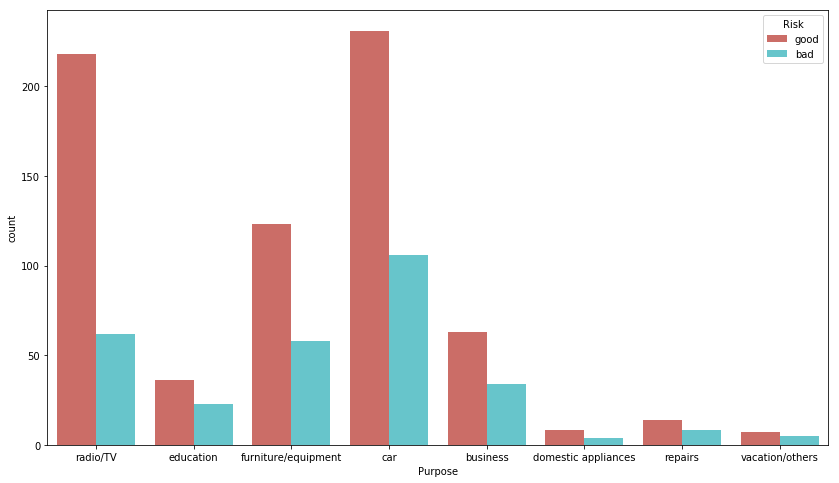

In [21]:
plt.figure(figsize=(14,8))
g = sns.countplot(x="Purpose", data=df, 
              palette="hls", hue = "Risk")

In [22]:
pd.crosstab(df['Risk'],df['Age'])

Age,19,20,21,22,23,24,25,26,27,28,...,62,63,64,65,66,67,68,70,74,75
Risk,,,,,,,,,,,,,,,,,,,,,
bad,1,5,5,11,20,19,19,14,13,15,...,0,1,0,1,2,0,2,0,1,0
good,1,9,9,16,28,25,22,36,38,28,...,2,7,5,4,3,3,1,1,3,2


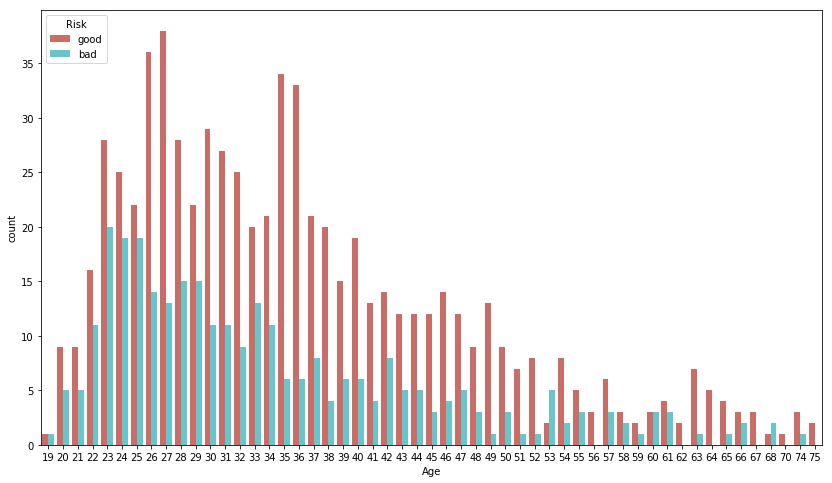

In [23]:
plt.figure(figsize=(14,8))
g = sns.countplot(x="Age", data=df, 
              palette="hls", hue = "Risk")

In [24]:
pd.crosstab(df['Risk'],df['Housing'])

Housing,free,own,rent
Risk,,,
bad,44,186,70
good,64,527,109


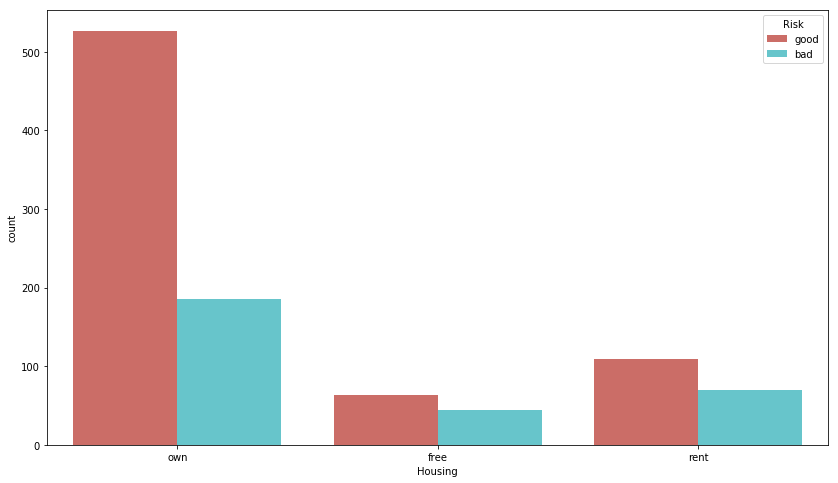

In [25]:
plt.figure(figsize=(14,8))
g = sns.countplot(x="Housing", data=df, 
              palette="hls", hue = "Risk")

In [27]:
#plt.hist(l1.loc[:, ['Age','Risk']])

In [28]:
#plt.hist(l1.loc[:, ['Age']])

In [29]:
#l1.groupby('Purpose')['Risk'].plot.hist()

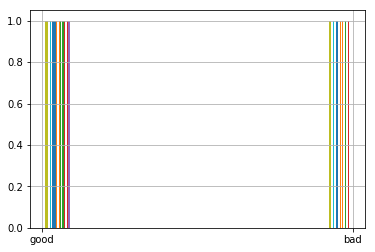

In [30]:
#l1['Risk'].hist();